In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
count=df['target'].value_counts()

In [5]:
count

1    165
0    138
Name: target, dtype: int64

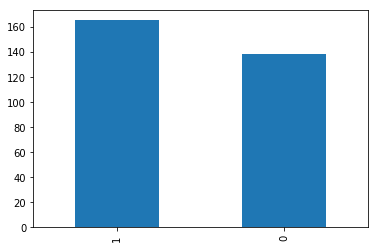

In [6]:
count.plot(kind="bar")

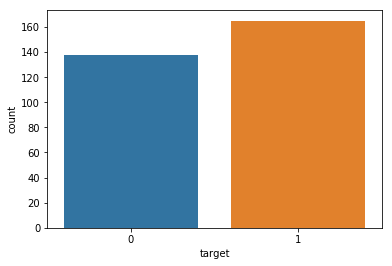

In [7]:
sns.countplot(x="target",data=df)

In [8]:
NoDisease=len(df[df.target==0])
Disease=len(df[df.target==1])

In [9]:
print("No Disease  "+str(NoDisease))
print("Disease " +str(Disease))

No Disease  138
Disease 165


Text(0.5, 0, 'sex(0=female, 1 = male)')

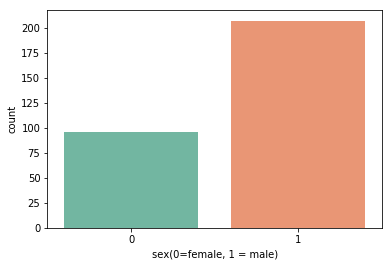

In [10]:
sns.countplot(x="sex",data=df,palette="Set2")
plt.xlabel("sex(0=female, 1 = male)")

In [11]:
#female patients
Female_patients= len(df[df["sex"]==0])

In [12]:
Female_patients

96

In [13]:
#male patients
Male_patients=len(df[df.sex==1])

In [14]:
Male_patients

207

In [15]:
#Logisitic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [17]:
x=df.iloc[:,:-1].values
y=df.iloc[:,13].values

In [18]:
lr=LogisticRegression()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [20]:
lr.fit(x_train,y_train)

/home/seethalprince/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 85.25%


In [64]:
y_pred=lr.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [66]:
cm

array([[22,  5],
       [ 4, 30]])

In [67]:
accuracy=(22+30)/(22+5+4+30)

In [68]:
accuracy*100

85.24590163934425

In [69]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
from sklearn .metrics import confusion_matrix
cm1=confusion_matrix(y_test,knn_pred)

In [70]:
cm1

array([[18,  9],
       [11, 23]])

In [71]:
acc_knn=(18+23)/(18+11+9+23)

In [72]:
acc_knn

0.6721311475409836

In [73]:
#svm

In [74]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

/home/seethalprince/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test,y_test)*100))

Test Accuracy of SVM Algorithm: 59.02%


In [76]:
#Gaussian NB

In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 85.25%


In [78]:
#decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 78.69%


In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 85.25%


In [81]:
df=pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
import pandas as pd
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
data=pd.read_csv("heart.csv")
print (data)
model=linear_model.LinearRegression()
model.fit(df[['age']],df.sex)
model.coef_
model.intercept_
import pickle
#with open('model_pickle','wb')as f:
    #pickle.dump(model,f) 
#with open('model_pickle','rb')as f:
    #mp=pickle.load(f)
#from sklearn.externals import joblib
   # mj=joblib.dump(model,'model_joblib')
   # joblib.load('model_joblib')

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

In [83]:
#x = data[['Heartbeat','pressure']]
#y = data.Age.values


In [117]:

rf=RandomForestClassifier()
rf.fit(x,y)
rf.score(x,y)

/home/seethalprince/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9933993399339934

In [85]:
joblib.dump(rf,'/home/seethalprince/Desktop/cdc2/model2.pk1')
rf_load=joblib.load('/home/seethalprince/Desktop/cdc2/model2.pk1')
assert rf.score(x,y)==rf_load.score(x,y)

In [119]:
rf.predict(x)
#rf.score(x,y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:

r=rf.score(x,y)
print(r)

0.9933993399339934


In [99]:
rf.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
data=pd.read_csv("/home/seethalprince/Downloads/HEART-DISEASE-CLASSIFICATION-master/test.csv")

In [101]:
print(data)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   4       145   233    1        1      150      0      2.3      0   

   ca  thal  target  
0   0     1       1  


In [115]:
rf.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [113]:
   rf.predict(data)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.